In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
X  = df.drop("sales", axis = 1)
y  = df["sales"]

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)


In [6]:
poly_features = polynomial_converter.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scalar = StandardScaler()

In [12]:
scalar.fit(X_train,y_train)

StandardScaler()

In [13]:
X_train = scalar.transform(X_train)

In [14]:
X_test = scalar.transform(X_test)

In [15]:
from sklearn.linear_model import Ridge

In [16]:
ridge_model = Ridge(alpha=10)

In [17]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [18]:
test_predictions = ridge_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
MAE = mean_absolute_error(y_test, test_predictions)

In [21]:
MAE

0.5774404204714175

In [22]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE

0.8946386461319681

In [23]:
from sklearn.linear_model import RidgeCV 

In [24]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0),scoring="neg_mean_absolute_error")

In [25]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [26]:
ridge_cv_model.alpha_

0.1

In [28]:
from sklearn.metrics import SCORERS

In [29]:
#SCORERS.keys()

In [30]:
test_predictions = ridge_cv_model.predict(X_test)

In [31]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.42737748843348755

In [32]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE

0.6180719926936749

In [33]:
ridge_cv_model.best_score_

-0.37492233402929653

In [35]:
ridge_cv_model

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [36]:
from sklearn.linear_model import LassoCV

In [37]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100,cv=5)

In [38]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [39]:
lasso_cv_model.alpha_

0.4943070909225828

In [40]:
test_predictions = lasso_cv_model.predict(X_test)

In [41]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE


0.6541723161252854

In [42]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))
RMSE

1.130800102276253

In [43]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [44]:
from sklearn.linear_model import ElasticNetCV

In [45]:
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1],eps=0.001,n_alphas=100,max_iter = 1000000)

In [47]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [49]:
elastic_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [50]:
test_predictions = elastic_model.predict(X_test)

(60,)

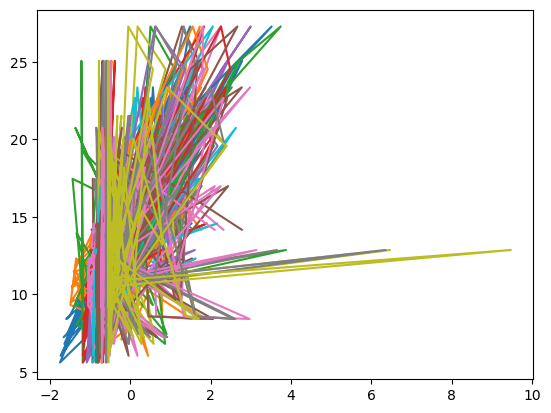